<a href="https://colab.research.google.com/github/mohiteprathamesh1996/Biomechanical-Features-of-Orthopedic-Patients/blob/main/ortho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Predict Biomechanical Features of Orthopaedic Patients using Sklearn Pipeline

#### Importing packages

In [75]:
import pandas as pd
pd.options.display.max_rows = 999
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### Load data

In [89]:
from google.colab import files

uploaded = files.upload()

df_features = pd.read_csv("column_2C_weka.csv")

Saving column_2C_weka.csv to column_2C_weka.csv


In [90]:
df_features.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


#### Checking for high correlation 

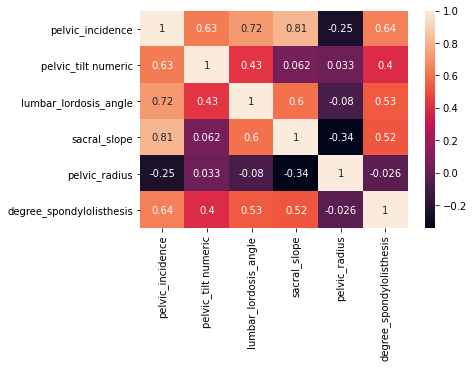

In [108]:
sns.heatmap(df_features.corr(), annot=True)

plt.show()

#### Split training and test data

In [92]:
X_train, X_test, y_train, y_test = train_test_split(df_features.drop(columns=["class"]), df_features["class"], test_size=0.20, random_state=42)

#### Fixing class imbalance in training dataset

In [101]:
print("Training data class imbalance is as follows:",y_train.value_counts())

from imblearn.over_sampling import SMOTE

os = SMOTE()

X_train_resampled, y_train_resampled = os.fit_resample(X_train, y_train)

Training data class imbalance is as follows: Abnormal    166
Normal       82
Name: class, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Create pipeline
##### Step 1: Data Preprocessing and scaling (mean=0, SD=1)
##### Step 2: Dimensionality reduction using Principal Component Analysis
##### Step 3: Fit model

In [123]:
# Number of PCs
pcs = 4

# Define pipeline for Logistic Regression classifier
lr_pipeline = Pipeline([("Scaling_1", StandardScaler()),
                        ("Dim_Red_1", PCA(n_components=pcs)),
                        ("Logistic Regression", LogisticRegression())])

# Define pipeline for Decision Tree classifier
dtree_pipeline = Pipeline([("Scaling_2", StandardScaler()),
                           ("Dim_Red_2", PCA(n_components=pcs)),
                           ("Decision Tree", DecisionTreeClassifier())])

# Define pipeline for Random Forest classifier
RF_pipeline = Pipeline([("Scaling_3", StandardScaler()),
                        ("Dim_Red_3", PCA(n_components=pcs)),
                        ("Random Forest", RandomForestClassifier())])

# Define pipeline for KNN classifier
KNN_pipeline = Pipeline([("Scaling_4", StandardScaler()),
                         ("Dim_Red_4", PCA(n_components=pcs)),
                         ("K-Nearest Neighbors", KNeighborsClassifier())])

# Define pipeline for Gradient boosting classifier
GBoost_pipeline = Pipeline([("Scaling_5", StandardScaler()),
                           ("Dim_Red_5", PCA(n_components=pcs)),
                           ("Gradient Boosting", GradientBoostingClassifier())])


# Create list of all above pipelines
concat_pipelines = [lr_pipeline, dtree_pipeline, RF_pipeline, KNN_pipeline, GBoost_pipeline]

#### Model fitting 

In [136]:
# Fit each model in the pipeline on the training data
for model in tqdm(concat_pipelines):
  model.fit(X_train_resampled, y_train_resampled)

# Best performance on test data
leaderboard = pd.DataFrame([(model.steps[2][0], 
               model.score(X_train_resampled, y_train_resampled), 
               model.score(X_test, y_test),
               model) for model in concat_pipelines], 
             columns=["Algorithm", "Training Accuracy", "Validation Accuracy","FittedModel"]).sort_values(by=["Validation Accuracy"], 
                                                                                  ascending=False).reset_index(drop=True).head()

leaderboard.head()

100%|██████████| 5/5 [00:00<00:00, 19.27it/s]


,Algorithm,Training Accuracy,Validation Accuracy,FittedModel
0,K-Nearest Neighbors,0.912651,0.822581,"(StandardScaler(copy=True, with_mean=True, wit..."
1,Gradient Boosting,1.000000,0.806452,"(StandardScaler(copy=True, with_mean=True, wit..."
2,Logistic Regression,0.816265,0.790323,"(StandardScaler(copy=True, with_mean=True, wit..."
3,Random Forest,1.000000,0.774194,"(StandardScaler(copy=True, with_mean=True, wit..."
4,Decision Tree,1.000000,0.758065,"(StandardScaler(copy=True, with_mean=True, wit..."
